# 2120203 Tutorial Project

This is Tutorial Project for 2102203 Probability and Statistics for Electrical Engineering 2023

Main Goal:
- Understand how to get data from API or Web Scraping
- Can compute some basic statistical parameters from the obtained data

---------------------------
This notebook was created by Patchapong Kulthumrongkul (12 October 2023)

You're welcome to use this tutorial as a guide for your project, **but it's essential to provide appropriate citations**

## Dependencies
The libraries required to import before beginning the project

In [ ]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## Method 1 Gather data from API

### Data Gathering
For more information about datasource: https://open-meteo.com/en/docs/historical-weather-api

You can try to see the original form of data through url below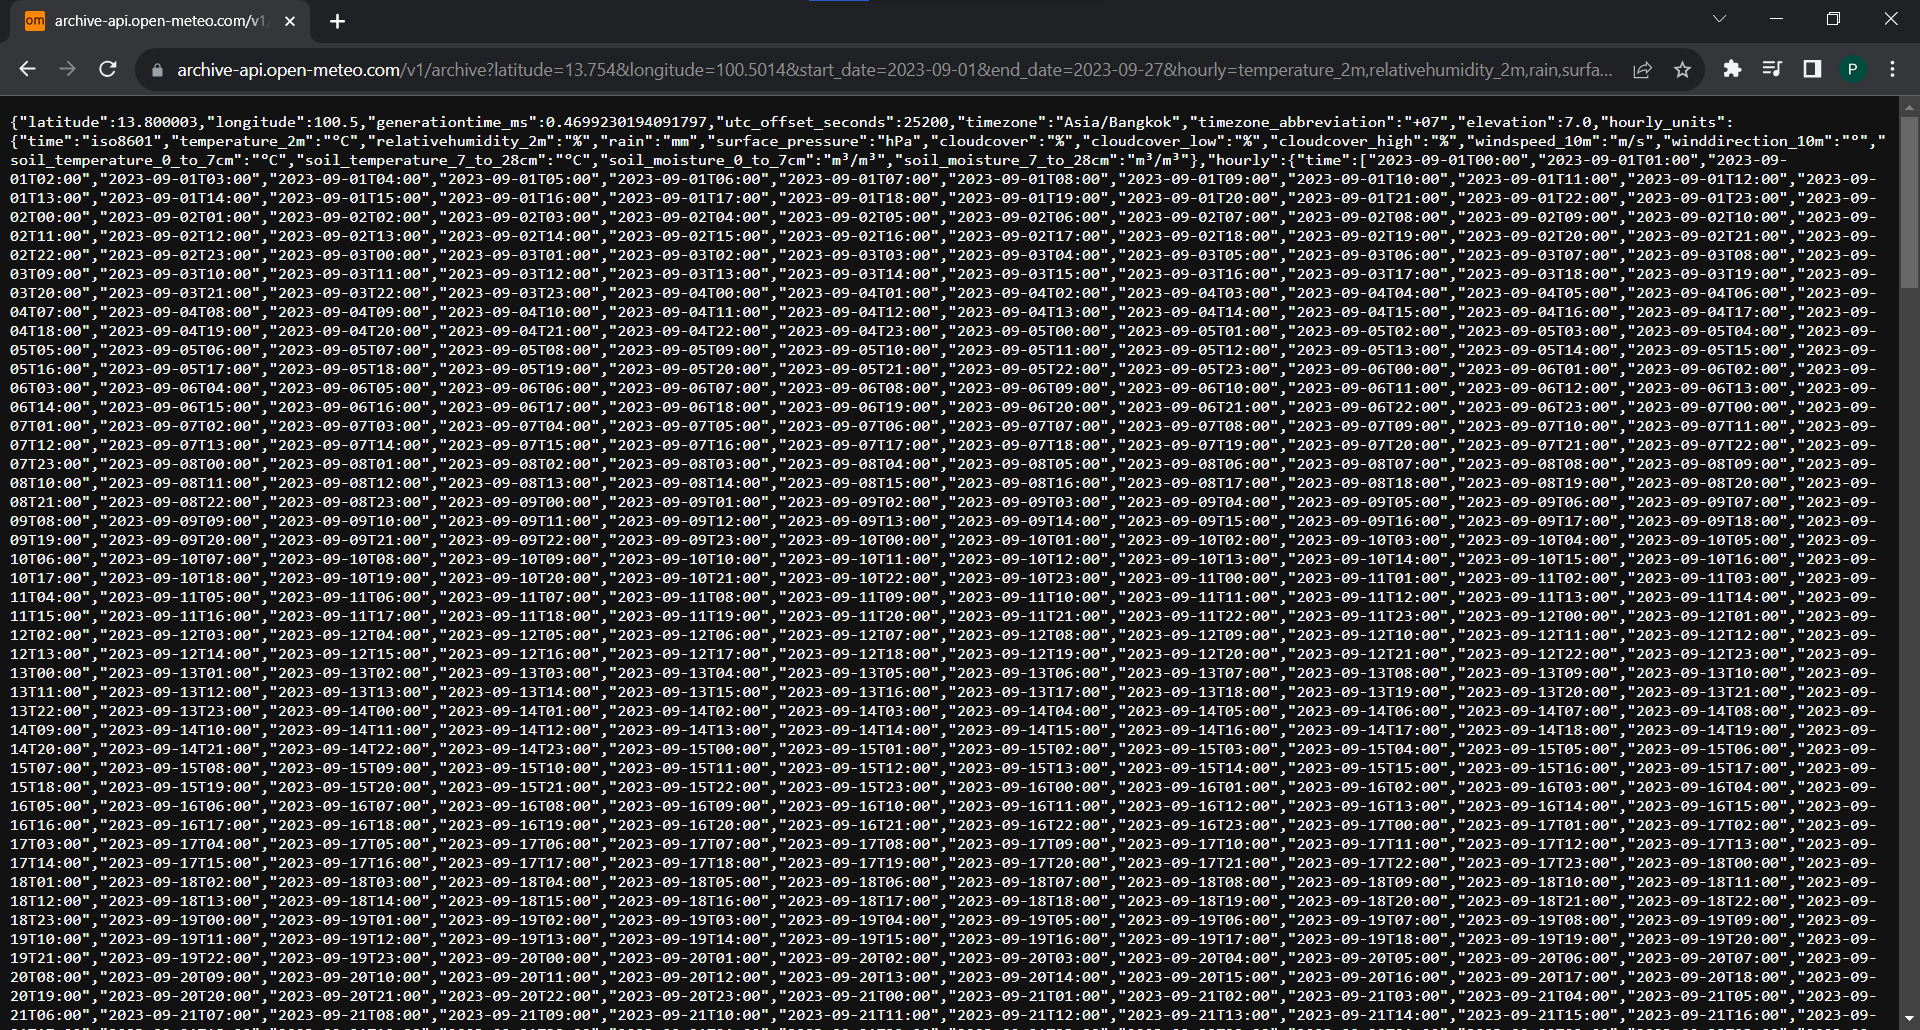

Ref: https://www.nbshare.io/notebook/713100085/How-To-Read-JSON-Data-Using-Python-Pandas/

In [ ]:
# Datasource that we want to get the data
url = "https://archive-api.open-meteo.com/v1/archive?latitude=13.754&longitude=100.5014&start_date=2023-09-01&end_date=2023-09-27&hourly=temperature_2m,relativehumidity_2m,rain,surface_pressure,cloudcover,cloudcover_low,cloudcover_high,windspeed_10m,winddirection_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm&windspeed_unit=ms&timezone=Asia%2FBangkok"

# Use GET request to obtain the data
response = requests.get(url).json()

# You can try printing the response to see the result from GET request
# print(response)

In [ ]:
# Show the list of features that we obtain
response["hourly"].keys()

dict_keys(['time', 'temperature_2m', 'relativehumidity_2m', 'rain', 'surface_pressure', 'cloudcover', 'cloudcover_low', 'cloudcover_high', 'windspeed_10m', 'winddirection_10m', 'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm', 'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm'])

In [ ]:
# Put all those data into a dataframe
df = pd.DataFrame.from_dict(response["hourly"])

# Show the dataframe
df

,time,temperature_2m,relativehumidity_2m,rain,surface_pressure,cloudcover,cloudcover_low,cloudcover_high,windspeed_10m,winddirection_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm
0,2023-09-01T00:00,27.1,88.0,0.2,1008.1,90.0,0.0,100.0,0.64,231.0,28.9,31.2,0.335,0.317
1,2023-09-01T01:00,26.7,88.0,0.1,1007.3,90.0,1.0,100.0,0.92,229.0,28.6,31.1,0.336,0.317
2,2023-09-01T02:00,26.5,95.0,0.7,1006.9,90.0,1.0,100.0,1.08,236.0,28.5,31.0,0.346,0.317
3,2023-09-01T03:00,26.5,94.0,0.6,1006.3,90.0,1.0,100.0,1.14,232.0,28.4,30.9,0.354,0.317
4,2023-09-01T04:00,26.4,94.0,0.5,1006.1,88.0,0.0,100.0,1.44,236.0,28.3,30.8,0.362,0.317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2023-09-27T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,2023-09-27T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,2023-09-27T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,2023-09-27T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [ ]:
# As you can see from above, some values are missing
# We have to drop the missing value before computing other parameters
df.dropna(inplace=True)

# Show the dataframe after drop NaN
df

,time,temperature_2m,relativehumidity_2m,rain,surface_pressure,cloudcover,cloudcover_low,cloudcover_high,windspeed_10m,winddirection_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm
0,2023-09-01T00:00,27.1,88.0,0.2,1008.1,90.0,0.0,100.0,0.64,231.0,28.9,31.2,0.335,0.317
1,2023-09-01T01:00,26.7,88.0,0.1,1007.3,90.0,1.0,100.0,0.92,229.0,28.6,31.1,0.336,0.317
2,2023-09-01T02:00,26.5,95.0,0.7,1006.9,90.0,1.0,100.0,1.08,236.0,28.5,31.0,0.346,0.317
3,2023-09-01T03:00,26.5,94.0,0.6,1006.3,90.0,1.0,100.0,1.14,232.0,28.4,30.9,0.354,0.317
4,2023-09-01T04:00,26.4,94.0,0.5,1006.1,88.0,0.0,100.0,1.44,236.0,28.3,30.8,0.362,0.317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,2023-09-27T02:00,25.3,94.0,0.8,1004.9,79.0,2.0,100.0,1.22,305.0,27.5,29.8,0.483,0.492
627,2023-09-27T03:00,25.3,94.0,0.8,1004.6,83.0,3.0,100.0,0.82,256.0,27.4,29.6,0.481,0.486
628,2023-09-27T04:00,25.4,93.0,0.5,1004.1,94.0,9.0,100.0,1.30,238.0,27.4,29.5,0.485,0.487
629,2023-09-27T05:00,25.4,93.0,0.3,1004.3,85.0,6.0,100.0,0.92,221.0,27.2,29.4,0.486,0.487


### Histogram of features

Ref: https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/

(array([ 88., 149., 109.,  81.,  51.,  54.,  37.,  33.,  21.,   8.]),
 array([24.9 , 25.86, 26.82, 27.78, 28.74, 29.7 , 30.66, 31.62, 32.58,
        33.54, 34.5 ]),
 <BarContainer object of 10 artists>)

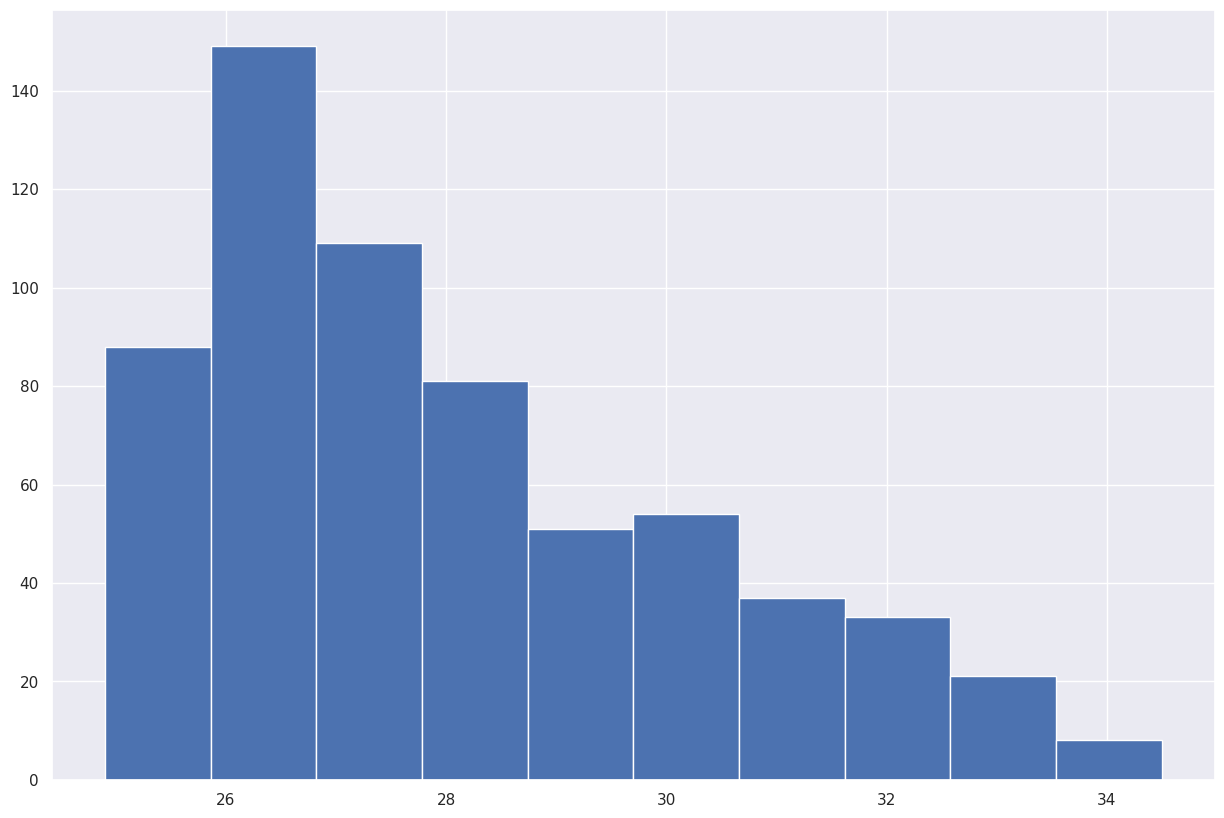

In [ ]:
plt.hist(df["temperature_2m"])

### Statistical Parameters

Ref:

https://medium.com/@kasiarachuta/basic-statistics-in-pandas-dataframe-594208074f85

https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

In [ ]:
# Compute some statistical parameters
print("Max Temperature: " + str(df["temperature_2m"].max()))
print("Min Temperature: " + str(df["temperature_2m"].min()))
print("Average Temperature:  " + str(round(df["temperature_2m"].mean(),2)))
print("Variance Temperature: " + str(round(df["temperature_2m"].var(),2)))

Max Temperature: 34.5
Min Temperature: 24.9
Average Temperature:  28.09
Variance Temperature: 4.95


In [ ]:
# Correlation Matrix
# The value of the correlation coefficient is in the range of [-1,1]
df.corr()

<ipython-input-53-393947c559cf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temperature_2m,relativehumidity_2m,rain,surface_pressure,cloudcover,cloudcover_low,cloudcover_high,windspeed_10m,winddirection_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm
temperature_2m,1.000000,-0.936318,-0.067948,-0.370617,-0.152374,0.354341,-0.329003,0.364041,0.256680,0.944295,0.349465,-0.308138,-0.201110
relativehumidity_2m,-0.936318,1.000000,0.123786,0.361965,0.103966,-0.273623,0.295046,-0.496173,-0.321075,-0.819342,-0.233696,0.393288,0.353858
rain,-0.067948,0.123786,1.000000,-0.111982,0.183039,0.163901,0.083428,-0.019328,-0.100133,0.088467,0.147071,0.244567,0.133420
surface_pressure,-0.370617,0.361965,-0.111982,1.000000,0.006355,-0.085508,0.054643,-0.209128,0.024875,-0.415739,-0.528352,0.363425,0.353113
cloudcover,-0.152374,0.103966,0.183039,0.006355,1.000000,0.231054,0.448912,0.148382,0.022555,-0.143584,-0.081273,0.030934,-0.117429
cloudcover_low,0.354341,-0.273623,0.163901,-0.085508,0.231054,1.000000,-0.111354,0.143006,0.039710,0.406058,0.185307,0.039799,0.150654
cloudcover_high,-0.329003,0.295046,0.083428,0.054643,0.448912,-0.111354,1.000000,-0.063629,-0.036379,-0.324584,-0.042004,0.133643,0.039033
windspeed_10m,0.364041,-0.496173,-0.019328,-0.209128,0.148382,0.143006,-0.063629,1.000000,0.227924,0.237191,-0.097290,-0.229661,-0.415591
winddirection_10m,0.256680,-0.321075,-0.100133,0.024875,0.022555,0.039710,-0.036379,0.227924,1.000000,0.159764,-0.047455,-0.182982,-0.224167
soil_temperature_0_to_7cm,0.944295,-0.819342,0.088467,-0.415739,-0.143584,0.406058,-0.324584,0.237191,0.159764,1.000000,0.506763,-0.259322,-0.087170


<ipython-input-54-e68c80f1b501>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), cmap="vlag", annot=True)


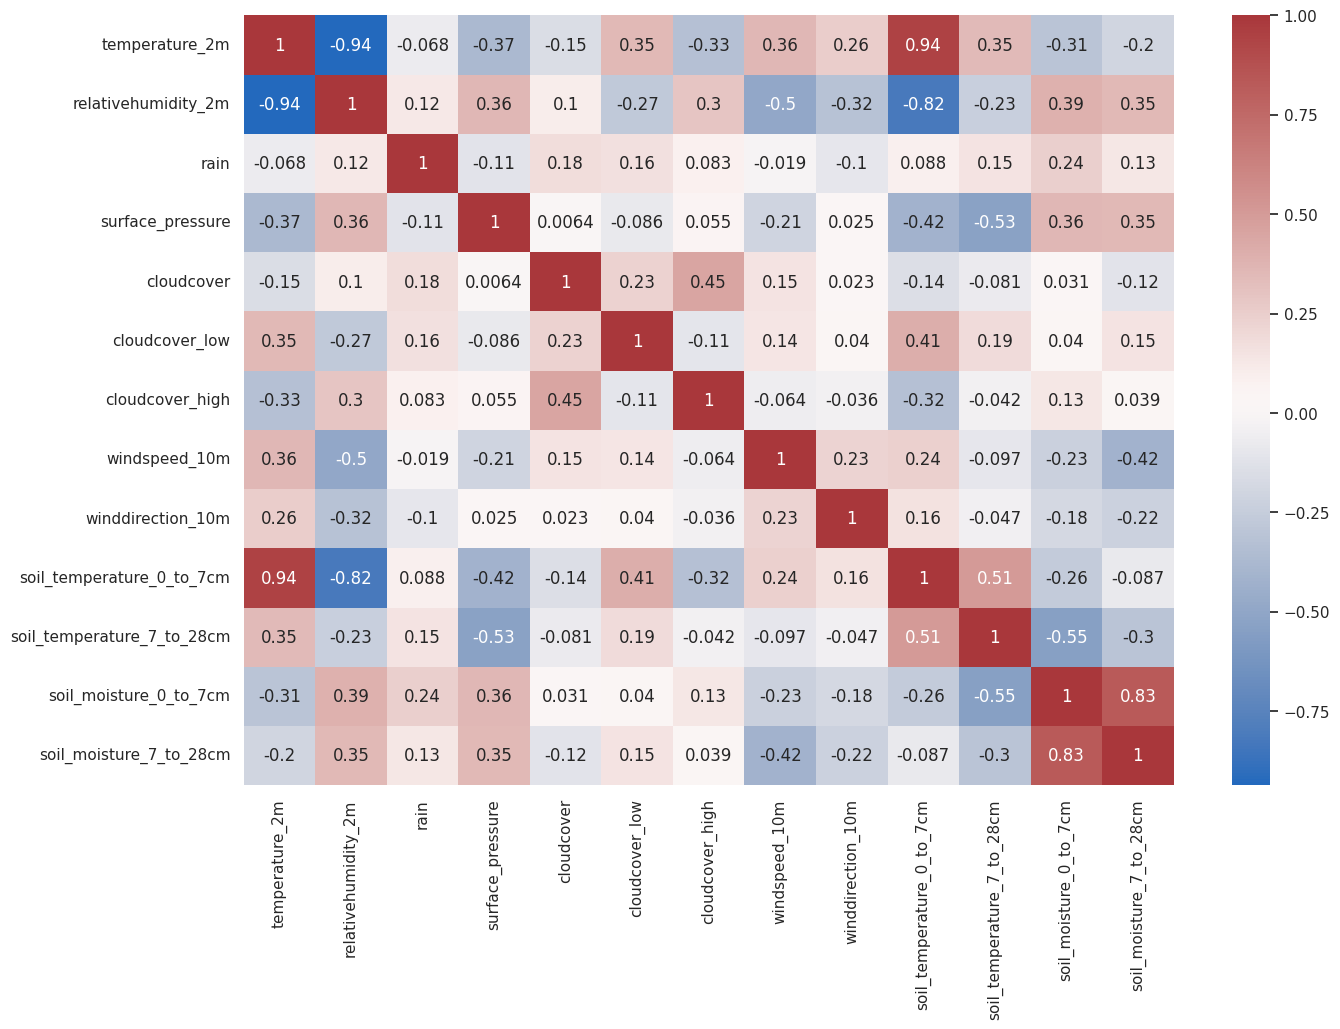

In [ ]:
# Another way the show the correlation matrix

# plotting correlation heatmap
sb.set (rc = {'figure.figsize':(15, 10)})
dataplot = sb.heatmap(df.corr(), cmap="vlag", annot=True)

# displaying heatmap
plt.show()

ref name date purpose license

# Method 2 Web Scraping

## Data Gathering
Assume we want the table "Population of states, territories, divisions and region" from https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population

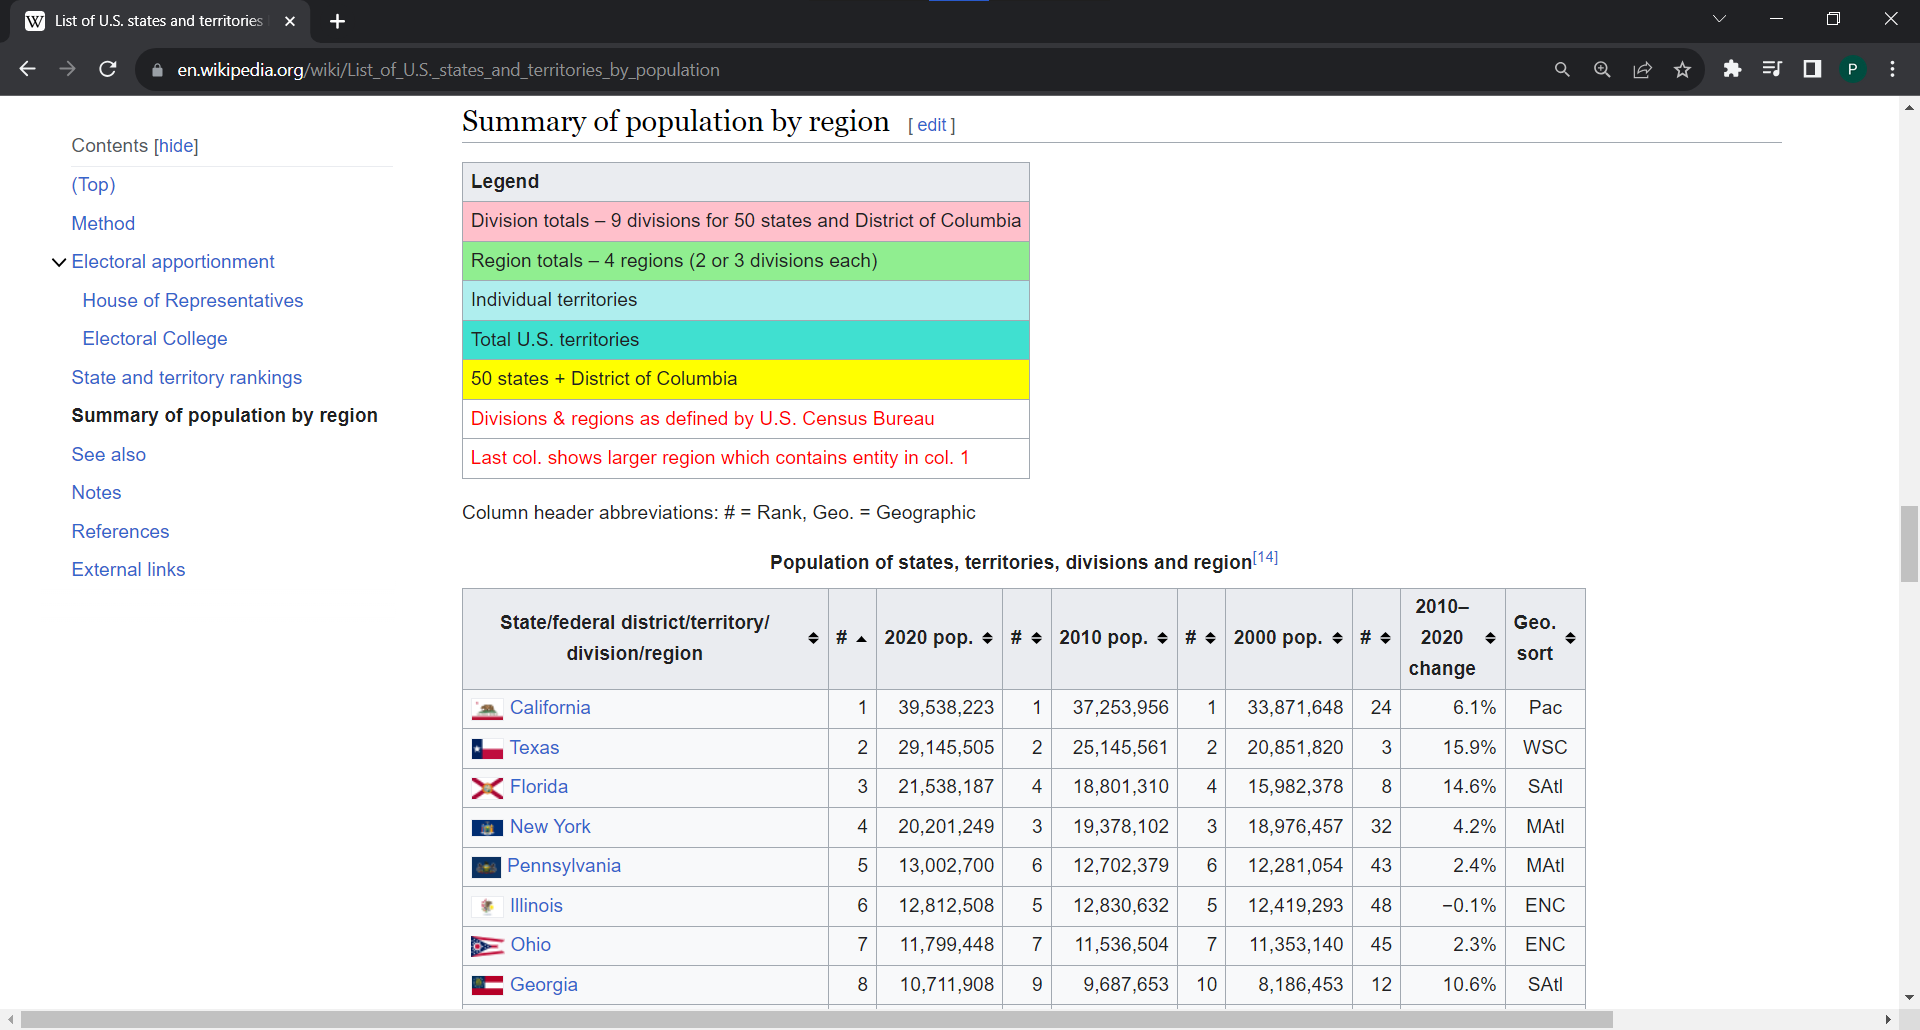

Ref: https://pbpython.com/pandas-html-table.html

In [ ]:
# Datasource that we want to get the data
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population"

# Extract table from website
table = pd.read_html(url, match="Population of states, territories, divisions and region")

In [ ]:
# Check if they have only one related table
len(table)

1

In [ ]:
# Make it to be dataframe
df = table[0]

# show some examples of data
df.head()

,State/federal district/territory/ division/region,#,2020 pop.,#.1,2010 pop.,#.2,2000 pop.,#.3,2010– 2020 change,Geo. sort
0,Massachusetts,15,7029917,14,6547629,13,6349097,21,7.4%,NEng
1,Connecticut,29,3605944,29,3574097,29,3405565,47,0.9%,NEng
2,New Hampshire,41,1377529,42,1316470,41,1235786,30,4.6%,NEng
3,Maine,42,1362359,41,1328361,40,1274923,42,2.6%,NEng
4,Rhode Island,43,1097379,43,1052567,43,1048319,31,4.3%,NEng


In [ ]:
# More information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   State/federal district/territory/ division/region  73 non-null     object
 1   #                                                  73 non-null     object
 2   2020 pop.                                          73 non-null     object
 3   #.1                                                73 non-null     object
 4   2010 pop.                                          73 non-null     object
 5   #.2                                                73 non-null     object
 6   2000 pop.                                          73 non-null     object
 7   #.3                                                73 non-null     object
 8   2010– 2020 change                                  73 non-null     object
 9   Geo.  sort             

## Try it by yourself
After this, you can try preprocessing and computing statistical parameters by yourself (see examples from Method 1)

# Other Methods
You may download a CSV file from the website and then upload it to your workspace before prepocessing and computing the statistical values.